<a href="https://colab.research.google.com/github/JATC1024/First-steps-into-Data-Science/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An attempt to the Titanic: Machine Learning from disaster contest

## The problem:
Given a dataset of some passengers that boarded on the Titanic, predict whether they survivied the accident or not.

## The dataset:
The dataset can be achieved on Kaggle: [dataset](https://www.kaggle.com/c/titanic/data).<br>
It contains some features which are briefly described:
- Survival: whether the passenger survived or not (0 = No, 1 = Yes).
- Pclass: passenger's ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd).
- Sex: passenger gender.
- Age: passenger age in years.
- Sibsp:	the total number of siblings and spouses that boarded on the Titanic.
- Parch: the total number of parents and children that boarded on the Titanic.
- Ticket:	passenger ticket number.
- Fare:	passenger fare.
- Cabin: passenger	cabin number.
- Embarked:	port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).



## Workflow:
We will work through the following steps:
1. Preprocess the data.
> Take a brief look at the data. <br>
> Visualize the data to observe the distributions. <br>
> Investigate on each individual feature. <br>
> Check for correlations between the features.
2. Create a  model and see how it perfomrs.
> Linear Regression. <br>
> Logistic Classifier.<br>
> Random Forest. <br>
> XGBoost <br>
3. Tuning the hyperparameters to get the best model.

## Preprocess the data:
In this step, we will convert our data into a structure that fits the models.

In [0]:
#@title Import libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
from matplotlib import pyplot as plt

### Load the data:

In [0]:
train_data = pd.read_csv('sample_data/train.csv', sep = ',')
test_data = pd.read_csv('sample_data/test.csv', sep = ',')

In [0]:
# Make a combination of the train and test data so that we can convert them at the same time
combined_data = train_data.append(test_data)

### Take a look at the data:

In [4]:
combined_data.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [5]:
# Check for missing values:
missing_values = combined_data.isnull()
print('Features with missing values:')
for feature in missing_values.columns.values:
  if missing_values[feature].any():
    print(feature, ':')
    print(missing_values[feature].value_counts())
    print()

Features with missing values:
Age :
False    1046
True      263
Name: Age, dtype: int64

Cabin :
True     1014
False     295
Name: Cabin, dtype: int64

Embarked :
False    1307
True        2
Name: Embarked, dtype: int64

Fare :
False    1308
True        1
Name: Fare, dtype: int64

Survived :
False    891
True     418
Name: Survived, dtype: int64



In [6]:
# Check for data types:
combined_data.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

So we have 6 **numeric features:** age, fare, parch, passengerid, pclass, sibsp and the other are **categorical features**: cabin, embarked, name, sex, ticket.

### Visualize the data to observe the distributions. 
Let's make some plots.

In [7]:
# Create a list of numeric features:
numeric_features = \
  [feature for feature in train_data.columns.values if np.issubdtype(train_data[feature].dtypes, np.number)]
numeric_features.remove('Survived')
numeric_features

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


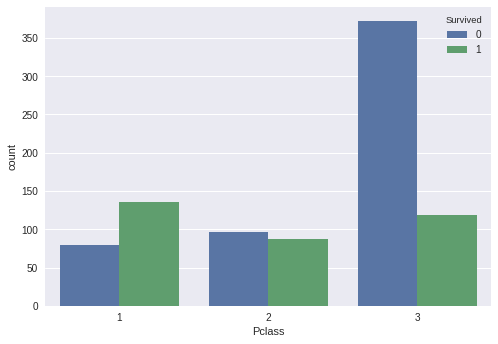

In [9]:
# Creat a histogram for each feature:
fig = plt.figure()
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_data)

for index, value in enumerate(numeric_features):
  ax = fig.add_subplot(2, 3, index + 1)
  sns.countplot(x = value, hue = 'Survived', data = train_data, ax = ax)
  

In [50]:
# Create a list of categorical features:
categorical_features = \
  [feature for feature in train_data.columns.values if not(np.issubdtype(train_data[feature].dtype, np.number))]
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']